In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_excel('JDS.xlsx', 'Задание1', skiprows = 6)

# a) ARIMA

In [3]:
train = pd.DataFrame(df.iloc[:60,:])
test = pd.DataFrame(df.iloc[-12:,:])

In [4]:
df=train

In [5]:
df.isnull().sum()

Месяц           0
Продажи руб.    0
dtype: int64

In [6]:
df = df.groupby('Месяц')['Продажи руб.'].sum().reset_index()

In [7]:
df = pd.DataFrame(df.iloc[:60,:])

In [8]:
df = df.set_index('Месяц')
df.index

DatetimeIndex(['2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01',
               '2008-09-01', '2008-10-01', '2008-11-01', '2008-12-01',
               '2009-01-01', '2009-02-01', '2009-03-01', '2009-04-01',
               '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01',
               '2009-09-01', '2009-10-01', '2009-11-01', '2009-12-01',
               '2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01', '2010-11-01', '2010-12-01',
               '2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
      

In [9]:
y = df['Продажи руб.'].resample('MS').mean()

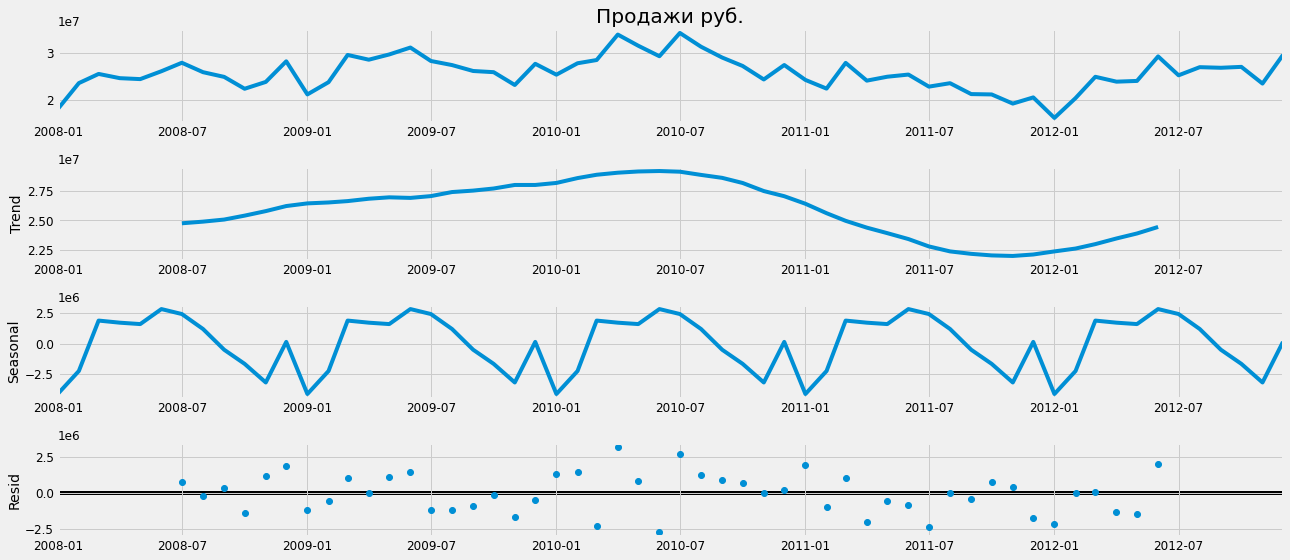

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [11]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 18) for x in list(itertools.product(p, d, q))]

In [12]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}18 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 18)18 - AIC:2184.54491641045
ARIMA(0, 0, 0)x(0, 0, 1, 18)18 - AIC:12394147681.694979
ARIMA(0, 0, 0)x(0, 1, 0, 18)18 - AIC:1403.2814040687824


/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 1, 1, 18)18 - AIC:775.1292331733852
ARIMA(0, 0, 0)x(1, 0, 0, 18)18 - AIC:1436.5571016502581
ARIMA(0, 0, 0)x(1, 0, 1, 18)18 - AIC:1478.0563509124672
ARIMA(0, 0, 0)x(1, 1, 0, 18)18 - AIC:796.2725176450757
ARIMA(0, 0, 0)x(1, 1, 1, 18)18 - AIC:770.7797439486195
ARIMA(0, 0, 1)x(0, 0, 0, 18)18 - AIC:2109.896867641394


/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 1, 18)18 - AIC:11838507941.535786
ARIMA(0, 0, 1)x(0, 1, 0, 18)18 - AIC:1354.9215635534401
ARIMA(0, 0, 1)x(0, 1, 1, 18)18 - AIC:740.2697282020783
ARIMA(0, 0, 1)x(1, 0, 0, 18)18 - AIC:1519.405318379835
ARIMA(0, 0, 1)x(1, 0, 1, 18)18 - AIC:1449.3494624719333
ARIMA(0, 0, 1)x(1, 1, 0, 18)18 - AIC:803.4767696510623
ARIMA(0, 0, 1)x(1, 1, 1, 18)18 - AIC:737.1795333259229
ARIMA(0, 1, 0)x(0, 0, 0, 18)18 - AIC:1897.0528162803298


/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 0, 1, 18)18 - AIC:148111953.248258
ARIMA(0, 1, 0)x(0, 1, 0, 18)18 - AIC:1348.7297933161426
ARIMA(0, 1, 0)x(0, 1, 1, 18)18 - AIC:730.8663025268409
ARIMA(0, 1, 0)x(1, 0, 0, 18)18 - AIC:1341.4954141150656
ARIMA(0, 1, 0)x(1, 0, 1, 18)18 - AIC:1313.772575087129
ARIMA(0, 1, 0)x(1, 1, 0, 18)18 - AIC:745.7836071721379
ARIMA(0, 1, 0)x(1, 1, 1, 18)18 - AIC:727.4055328812776
ARIMA(0, 1, 1)x(0, 0, 0, 18)18 - AIC:1856.8339358393207
ARIMA(0, 1, 1)x(0, 0, 1, 18)18 - AIC:144248179.53478426
ARIMA(0, 1, 1)x(0, 1, 0, 18)18 - AIC:1310.7243546649008
ARIMA(0, 1, 1)x(0, 1, 1, 18)18 - AIC:697.0638848364124
ARIMA(0, 1, 1)x(1, 0, 0, 18)18 - AIC:1332.2693788150812
ARIMA(0, 1, 1)x(1, 0, 1, 18)18 - AIC:1270.2902343205851
ARIMA(0, 1, 1)x(1, 1, 0, 18)18 - AIC:760.80595988337
ARIMA(0, 1, 1)x(1, 1, 1, 18)18 - AIC:694.8465219222526
ARIMA(1, 0, 0)x(0, 0, 0, 18)18 - AIC:1934.103193499217
ARIMA(1, 0, 0)x(0, 0, 1, 18)18 - AIC:177440187.1620309
ARIMA(1, 0, 0)x(0, 1, 0, 18)18 - AIC:1374.5463670069803
ARIMA

/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 0, 1, 18)18 - AIC:143358724.23045516
ARIMA(1, 1, 0)x(0, 1, 0, 18)18 - AIC:1344.2249046495995
ARIMA(1, 1, 0)x(0, 1, 1, 18)18 - AIC:729.2790100237848
ARIMA(1, 1, 0)x(1, 0, 0, 18)18 - AIC:1301.563914079603
ARIMA(1, 1, 0)x(1, 0, 1, 18)18 - AIC:1303.3196614366852
ARIMA(1, 1, 0)x(1, 1, 0, 18)18 - AIC:724.6091712324828
ARIMA(1, 1, 0)x(1, 1, 1, 18)18 - AIC:726.3954612304443
ARIMA(1, 1, 1)x(0, 0, 0, 18)18 - AIC:1858.5296771934493
ARIMA(1, 1, 1)x(0, 0, 1, 18)18 - AIC:133094175.69501539
ARIMA(1, 1, 1)x(0, 1, 0, 18)18 - AIC:1312.3372500268674
ARIMA(1, 1, 1)x(0, 1, 1, 18)18 - AIC:698.3362992434676
ARIMA(1, 1, 1)x(1, 0, 0, 18)18 - AIC:1300.6016351817311
ARIMA(1, 1, 1)x(1, 0, 1, 18)18 - AIC:1270.7215772817622
ARIMA(1, 1, 1)x(1, 1, 0, 18)18 - AIC:727.247279239117
ARIMA(1, 1, 1)x(1, 1, 1, 18)18 - AIC:696.3543025227241


In [13]:
model = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 18),
                                enforce_stationarity=True,
                                enforce_invertibility=False)
results = model.fit()

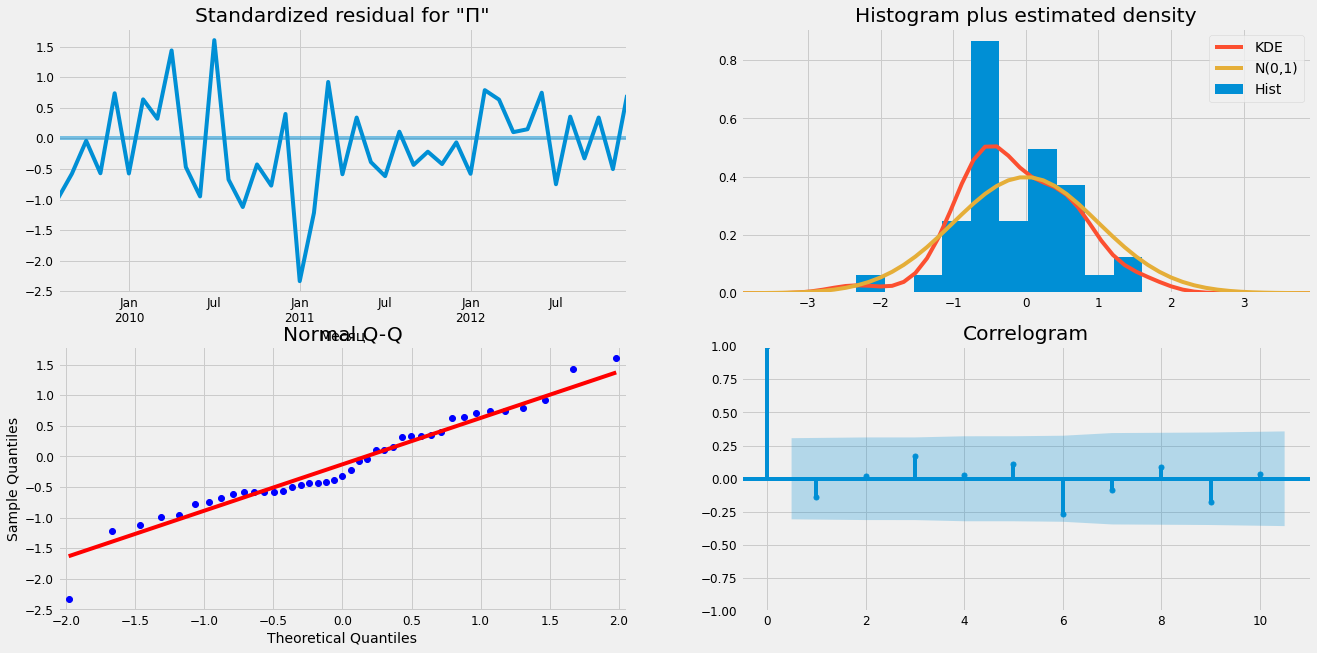

In [14]:
results.plot_diagnostics(figsize=(20, 10))
plt.show()

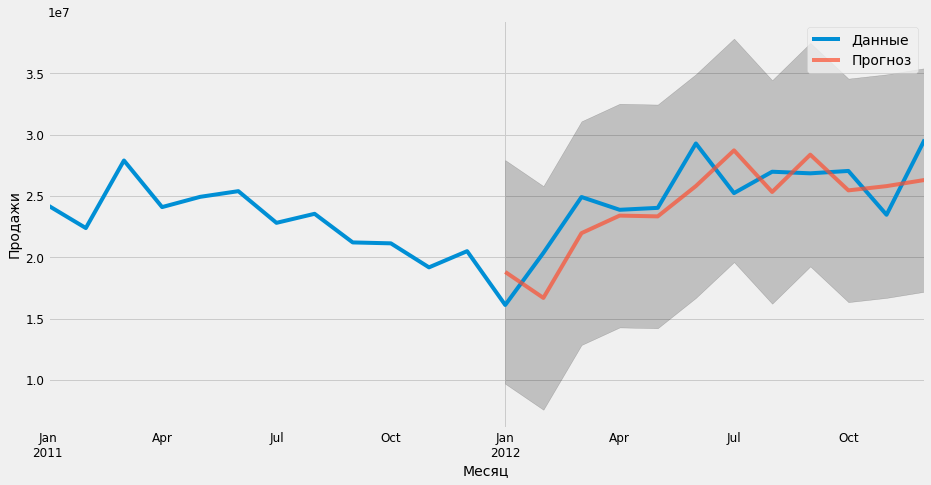

In [15]:
pred = results.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2011':].plot(label='Данные')
pred.predicted_mean.plot(ax=ax, label='Прогноз', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Месяц')
ax.set_ylabel('Продажи')
plt.legend()
plt.show()

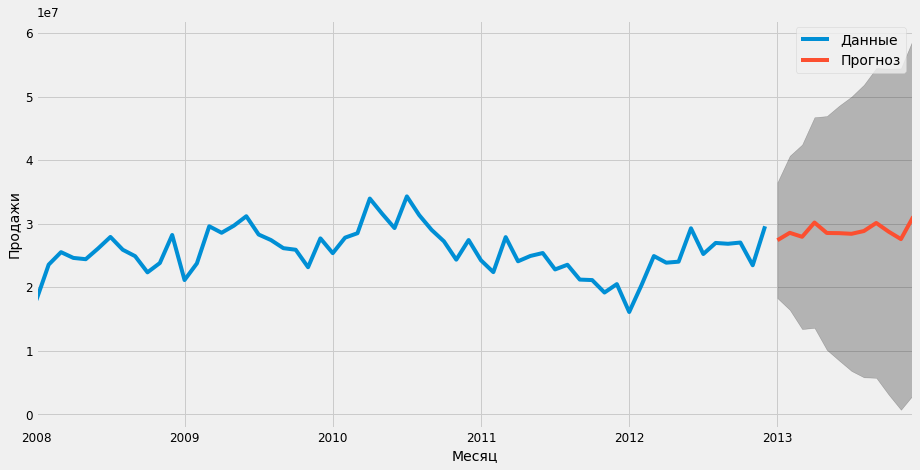

In [16]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='Данные', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Прогноз')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Месяц')
ax.set_ylabel('Продажи')
plt.legend()
plt.show()

In [17]:
y_forecasted = pred.predicted_mean
y_truth = y['2008-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('mse = {}'.format(round(mse, 2)))

mse = 6516664891661.67


# B) Regression


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [19]:
df_r = pd.read_excel('JDS.xlsx', 'Задание1', skiprows = 6)

In [20]:
train_r = pd.DataFrame(df_r.iloc[:60,:])

In [21]:
train_r['Месяц'] = train_r['Месяц'].values.astype(float)
x = train_r['Месяц']
x = x.values.reshape(-1,1)

In [22]:
y = train_r['Продажи руб.']

In [23]:
lr1 = LinearRegression()
lr1.fit(x, y)

LinearRegression()

In [24]:
print(lr1.coef_)
print(lr1.intercept_)
print(mean_squared_error(y, lr1.predict(x)))

[-8.68067928e-12]
36812829.24607221
12700205975080.457


# Более точные значения достигнуты с помощью алгоритма ARIMA, так как MSE на тренировочном сете ниже. 

In [25]:
a = pred_uc.predicted_mean.to_list()
test['Продажи руб.'] = a

In [26]:
test

,Месяц,Продажи руб.
60,2013-01-01,2.741855e+07
61,2013-02-01,2.857991e+07
62,2013-03-01,2.795497e+07
63,2013-04-01,3.019699e+07
64,2013-05-01,2.855557e+07
65,2013-06-01,2.852958e+07
66,2013-07-01,2.842702e+07
67,2013-08-01,2.886221e+07
68,2013-09-01,3.013247e+07
69,2013-10-01,2.877029e+07
